In [56]:
print("TEST")

TEST


In [122]:
ls YichenKei/*

YichenKei/detected:
IRAS16547.232510MHz.NaCl_v=1.image.pbcor.fits*
IRAS16547.234252MHz.NaCl.image.pbcor.fits*

YichenKei/other:
IRAS16547.217980MHz.NaCl_v=2.image.pbcor.fits*
IRAS16547.219615MHz.NaCl_v=1.image.pbcor.fits*
IRAS16547.350969MHz.NaCl.image.pbcor.fits*
IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor.fits*

YichenKei/spectra:
figures/
IRAS16547.217980MHz.NaCl_v=2.image.pbcor_meanspec.fits
IRAS16547.219615MHz.NaCl_v=1.image.pbcor_meanspec.fits
IRAS16547.232510MHz.NaCl_v=1.image.pbcor_meanspec.fits
IRAS16547.234252MHz.NaCl.image.pbcor_meanspec.fits
IRAS16547.350969MHz.NaCl.image.pbcor_meanspec.fits
IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_meanspec.fits
IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor_meanspec.fits
IRAS16547.Band3.spw1.selfcal.rp.image.pbcor_meanspec.fits
IRAS16547.Band3.spw2.selfcal.rp.image.pbcor_meanspec.fits
IRAS16547.Band3.spw3.selfcal.rp.image.pbcor_meanspec.fits
IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_meanspec.fits
IRAS16547.Band6.spw1

In [58]:
from spectral_cube import SpectralCube

In [59]:
cubev0 = SpectralCube.read('YichenKei/detected/IRAS16547.234252MHz.NaCl.image.pbcor.fits', use_dask=True)
cubev0

DaskSpectralCube with shape=(161, 1024, 1024) and unit=Jy / beam and chunk size (161, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    161  type_s: VRAD      unit_s: m / s  range:  -129952.786 m / s:   70020.571 m / s

In [60]:
cubev1 = SpectralCube.read('YichenKei/detected/IRAS16547.232510MHz.NaCl_v=1.image.pbcor.fits', use_dask=True)
cubev1

DaskSpectralCube with shape=(159, 1024, 1024) and unit=Jy / beam and chunk size (159, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    159  type_s: VRAD      unit_s: m / s  range:  -129436.166 m / s:   69516.903 m / s

In [61]:
%matplotlib inline
import pylab as pl
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2aefa00b34c0>

In [62]:
from astropy import coordinates, units as u

In [63]:
peakA = coordinates.SkyCoord('16:58:17.2082 -42:52:07.421', frame='icrs', unit=(u.hour, u.deg))
peakB = coordinates.SkyCoord('16:58:17.2173 -42:52:07.461', frame='icrs', unit=(u.hour, u.deg))

In [64]:
scubev1 = cubev1[:,460:570,440:540]

In [65]:
import regions

DaskSpectralCube with shape=(159, 125, 125) and unit=Jy / beam and chunk size (159, 73, 65):
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571514 deg:  254.571890 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868866 deg:  -42.868590 deg
 n_s:    159  type_s: VRAD      unit_s: m / s  range:  -129436.166 m / s:   69516.903 m / s

In [95]:
cutout = regions.RectangleSkyRegion(center=peakB, width=1*u.arcsec, height=1*u.arcsec)
peakAcirc = regions.CircleSkyRegion(peakA, radius=0.08*u.arcsec)
peakBcirc = regions.CircleSkyRegion(peakB, radius=0.08*u.arcsec)

In [96]:
scubev1 = cubev1.subcube_from_regions([cutout])

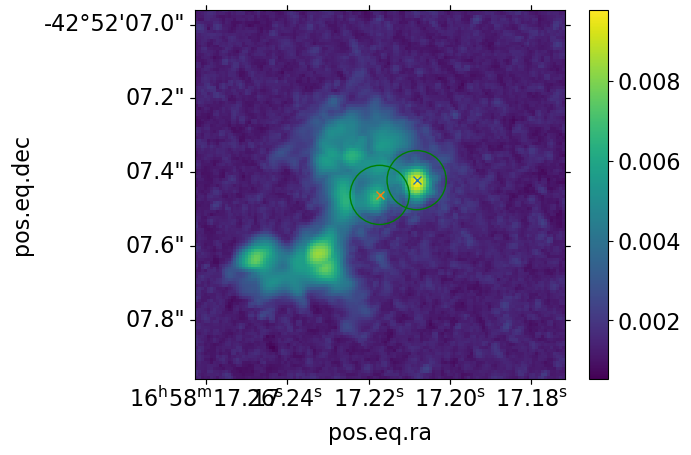

In [97]:
mx = scubev1.max(axis=0)
ax = pl.subplot(projection=mx.wcs)
_=pl.imshow(mx.value, origin='lower', interpolation='none')
_=pl.colorbar()
_=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
_=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
peakApix = peakAcirc.to_pixel(mx.wcs)
ax.add_artist(peakApix.as_artist())
peakBpix = peakBcirc.to_pixel(mx.wcs)
ax.add_artist(peakBpix.as_artist())

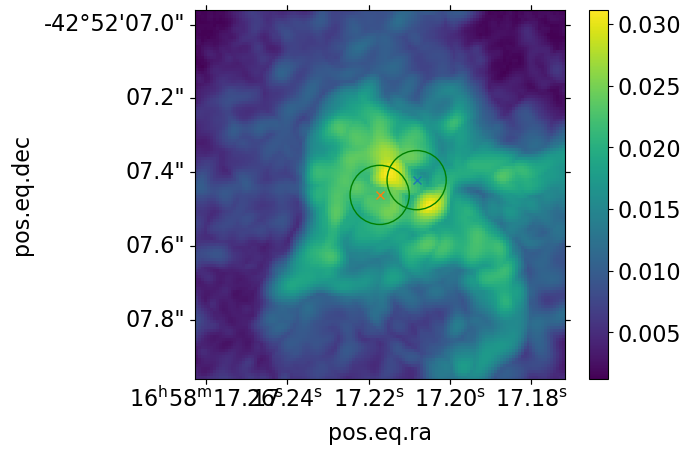

In [98]:
scubev0 = cubev0.subcube_from_regions([cutout])
mx = scubev0.max(axis=0)
ax = pl.subplot(projection=mx.wcs)
_=pl.imshow(mx.value, origin='lower', interpolation='none')
_=pl.colorbar()
_=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
_=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
peakApix = peakAcirc.to_pixel(mx.wcs)
ax.add_artist(peakApix.as_artist())
peakBpix = peakBcirc.to_pixel(mx.wcs)
ax.add_artist(peakBpix.as_artist())

In [99]:
msk = mx > 0.004*mx.unit
sp = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).with_mask(msk).mean(axis=(1,2))
spA = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakAcirc]).mean(axis=(1,2))
spB = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakBcirc]).mean(axis=(1,2))

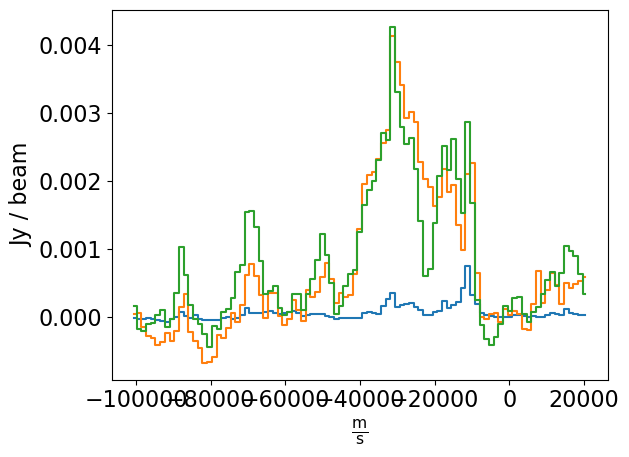

In [100]:
sp.quicklook()
spA.quicklook()
spB.quicklook()

In [101]:
msk = mx > 0.004*mx.unit
sp = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).with_mask(msk).mean(axis=(1,2))
spA = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakAcirc]).mean(axis=(1,2))
spB = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakBcirc]).mean(axis=(1,2))

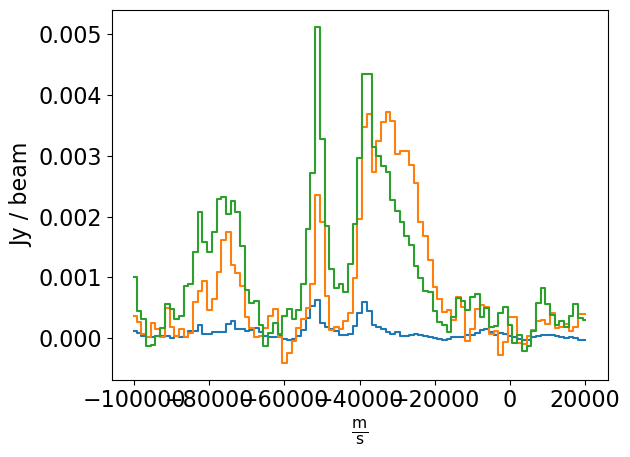

In [102]:
sp.quicklook()
spA.quicklook()
spB.quicklook()

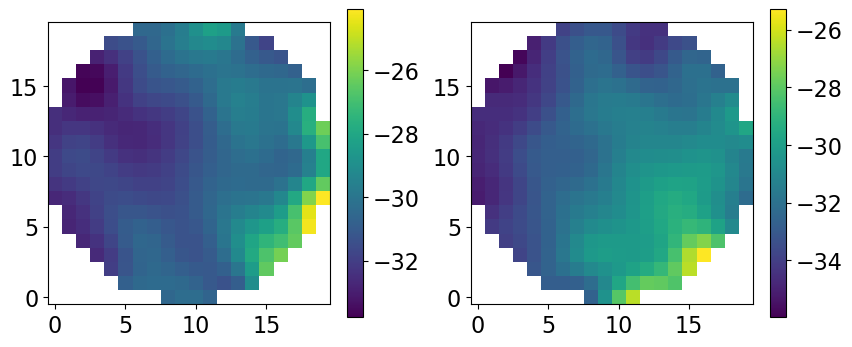

In [103]:
pl.figure(figsize=(10,4))
vmapA = m1 = scubev1.subcube_from_regions([peakAcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -22*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,1)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

vmapA = m1 = scubev0.subcube_from_regions([peakAcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -22*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,2)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

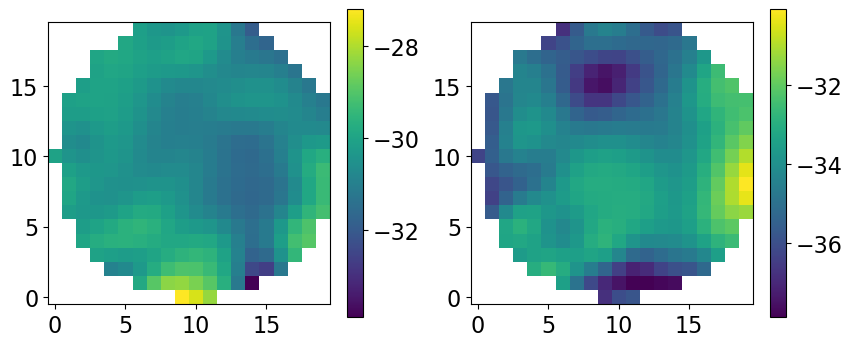

In [104]:
pl.figure(figsize=(10,4))
vmapB = m1 = scubev1.subcube_from_regions([peakBcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -18*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,1)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

vmapB = m1 = scubev0.subcube_from_regions([peakBcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -18*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,2)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

In [164]:
# use this to look up line frequencies
salt_tables[3][salt_tables[3]['Ju'] == 18]

<Table length=81>
Iso    Ju    Jl  ...        E_L              QNs             Species        
                 ...                                                        
str2 int16 int16 ...      float64           str15             str24         
---- ----- ----- ... ------------------ ------------- ----------------------
  35    18    17 ...  4109.011540293838 v=8-8 J=18-17 23Na-35Clv=8-8 J=18-17
  35    18    17 ... 3624.2316737862175 v=7-7 J=18-17 23Na-35Clv=7-7 J=18-17
  35    18    17 ...  3134.751274610608 v=6-6 J=18-17 23Na-35Clv=6-6 J=18-17
  35    18    17 ...  2640.470342527048 v=5-5 J=18-17 23Na-35Clv=5-5 J=18-17
  35    18    17 ...  2141.288877343567 v=4-4 J=18-17 23Na-35Clv=4-4 J=18-17
  35    18    17 ... 1637.3068788681962 v=3-3 J=18-17 23Na-35Clv=3-3 J=18-17
  35    18    17 ... 1128.4243468129803 v=2-2 J=18-17 23Na-35Clv=2-2 J=18-17
  35    18    17 ...  614.5412810339421 v=1-1 J=18-17 23Na-35Clv=1-1 J=18-17
  35    18    17 ...  95.65768133911207 v=0-0 J=18-17 23Na-35Clv=0-0 J=18-17
 ...   ...   ... ...                ...           ...                    ...
  35    18    19 ...  637.6117080426252 v=7-1 J=18-19 23Na-35Clv=7-1 J=18-19
  35    18    17 ...  614.6755903275834 v=7-1 J=18-17 23Na-35Clv=7-1 J=18-17
  35    18    19 ... 118.87136424151322 v=6-0 J=18-19 23Na-35Clv=6-0 J=18-19
  35    18    17 ...  95.76341340399176 v=6-0 J=18-17 23Na-35Clv=6-0 J=18-17
  35    18    19 ...  637.6523503178119 v=8-1 J=18-19 23Na-35Clv=8-1 J=18-19
  35    18    17 ...   614.716232602771 v=8-1 J=18-17 23Na-35Clv=8-1 J=18-17
  35    18    19 ... 118.87804211995535 v=7-0 J=18-19 23Na-35Clv=7-0 J=18-19
  35    18    17 ...  95.77010567020398 v=7-0 J=18-17 23Na-35Clv=7-0 J=18-17
  35    18    19 ... 118.91868439514337 v=8-0 J=18-19 23Na-35Clv=8-0 J=18-19
  35    18    17 ...  95.81073355762146 v=8-0 J=18-17 23Na-35Clv=8-0 J=18-17

In [160]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
kcl1312_22_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=98.70595243263405*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99.31662591202812*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99.92952090985044*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
nacl87_2337_33_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99726.74800*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
nacl2726_2335_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=350969.30000*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
nacl2827_2337_22_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=350916.27200*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
nacl1817_2335_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band6.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=234251.91200*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
nacl1817_2335_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=232509.97700*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)

kcl4645_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=352.4286424785739*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl_4135_4746_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=351.7695170324307*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)

kcl_4135_1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.62808576093418*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl_4135_1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.03620007980506*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl_3937_1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.0894846636644*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
kcl_3937_1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=96.5024933707571*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s)

In [169]:
names = {val: key.strip("_cube") for key, val in locals().items() if 'cube' in key}

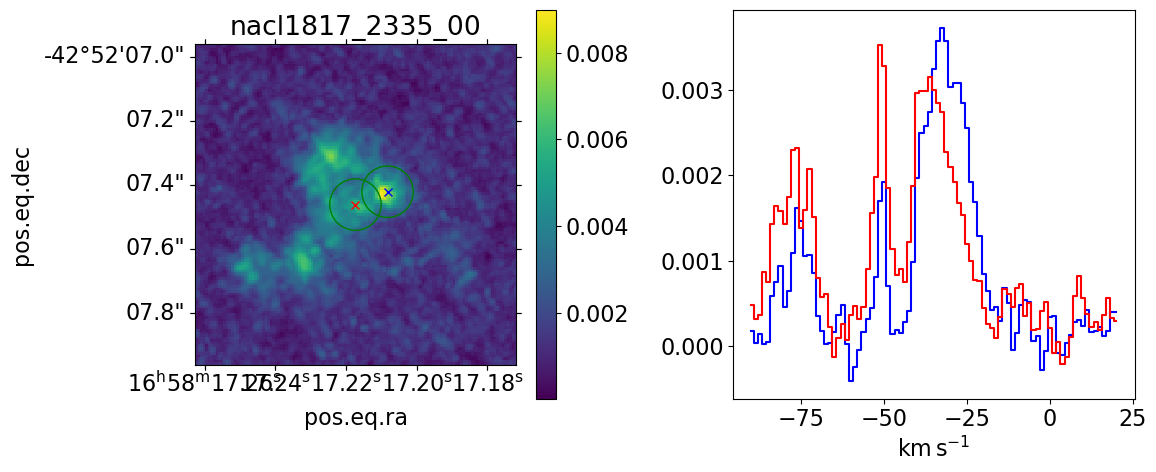

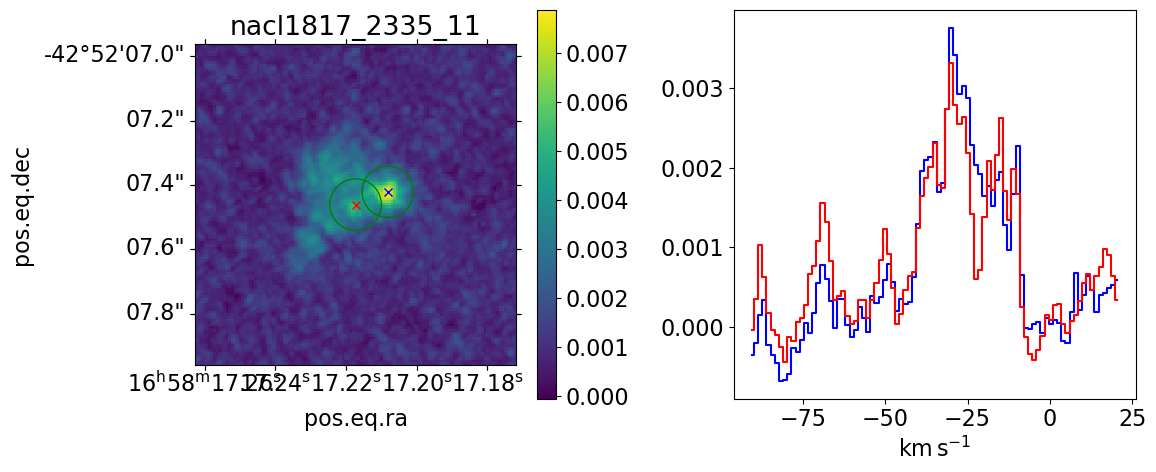

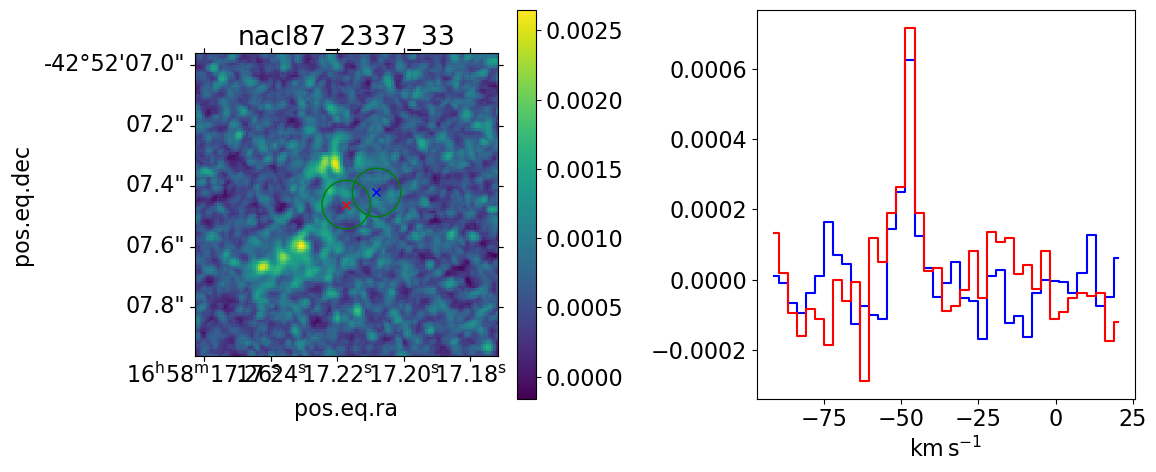

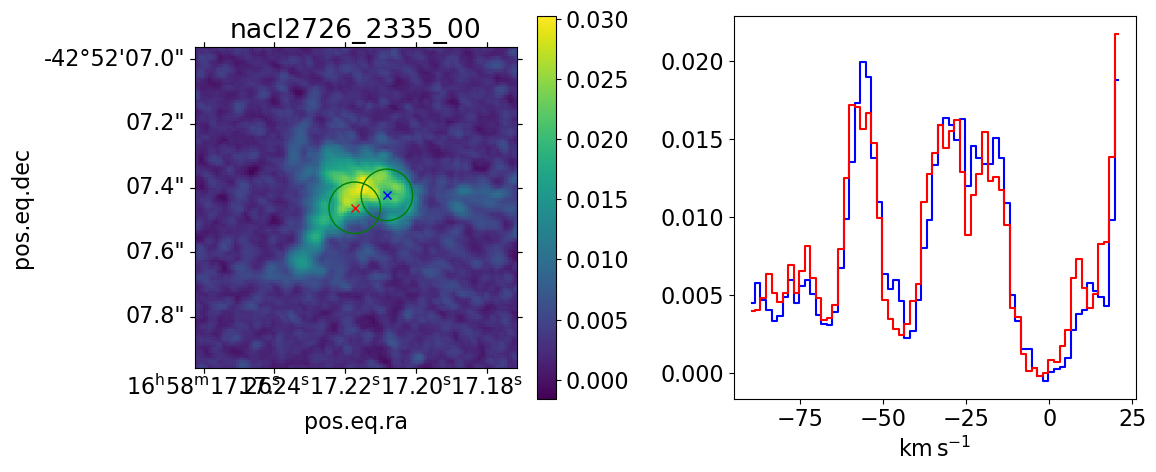

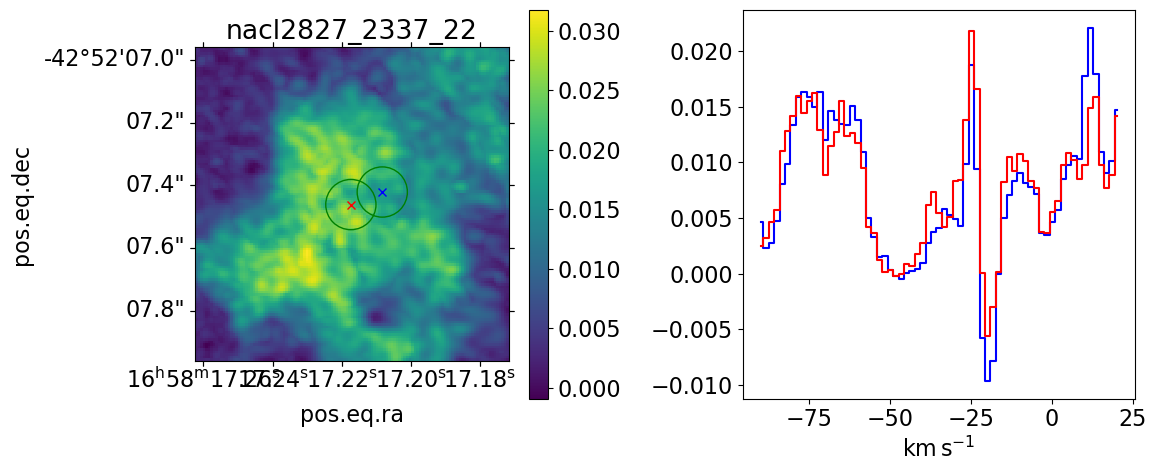

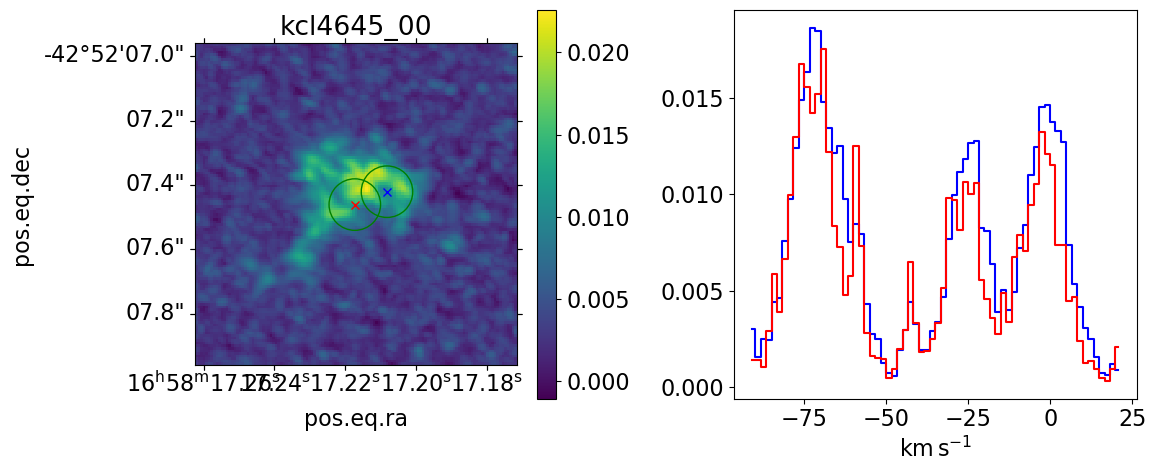

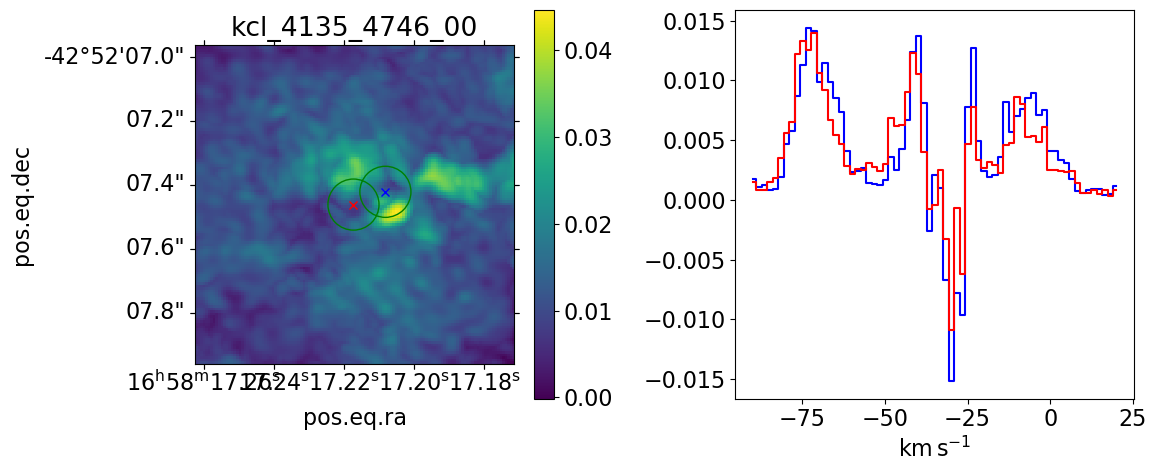

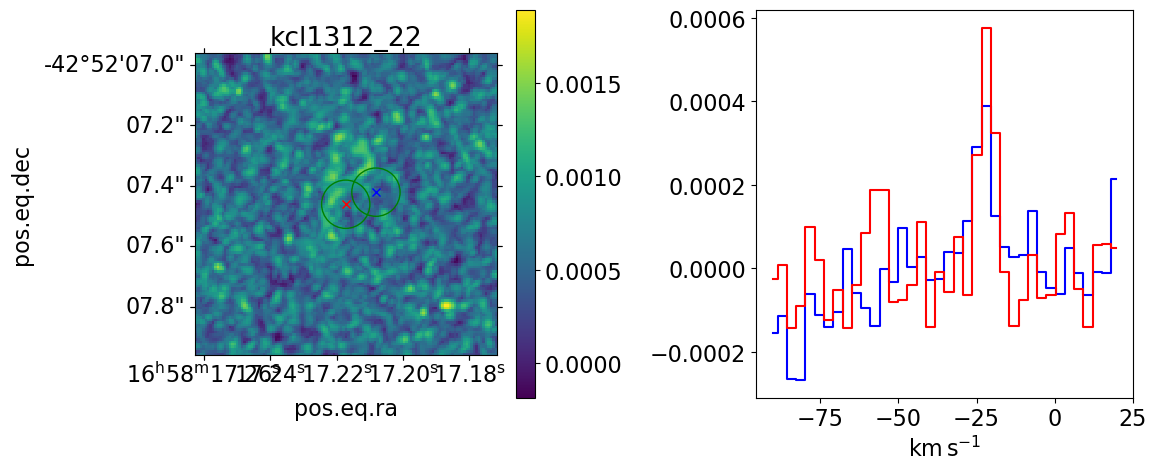

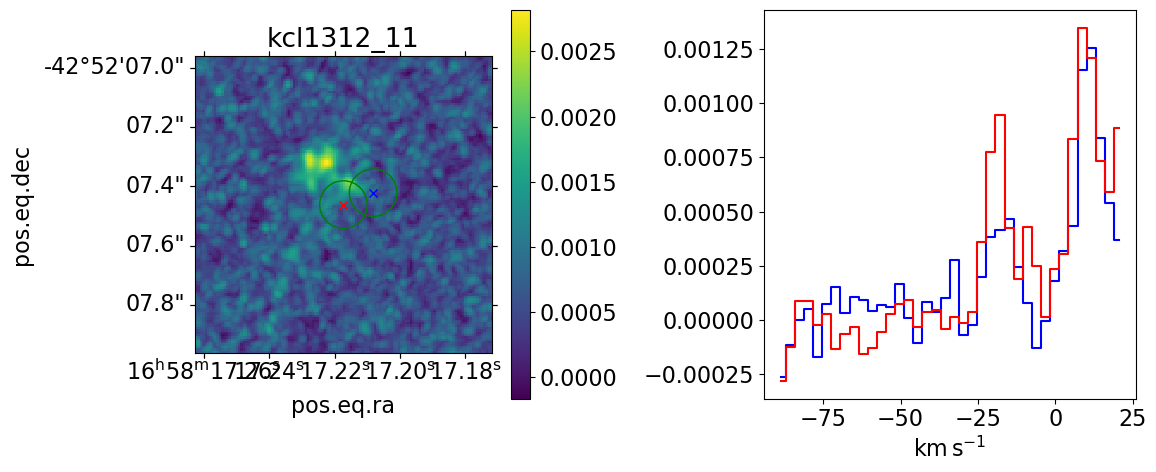

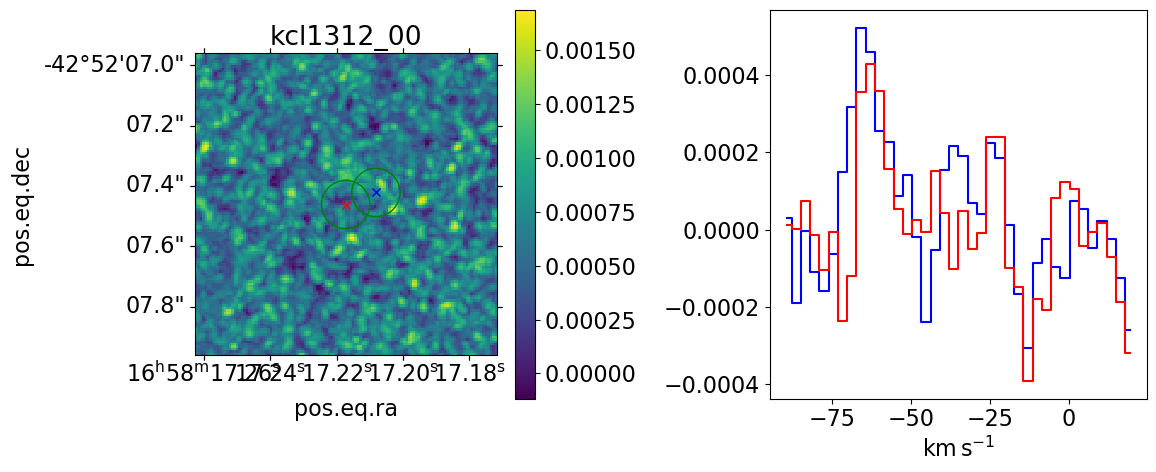

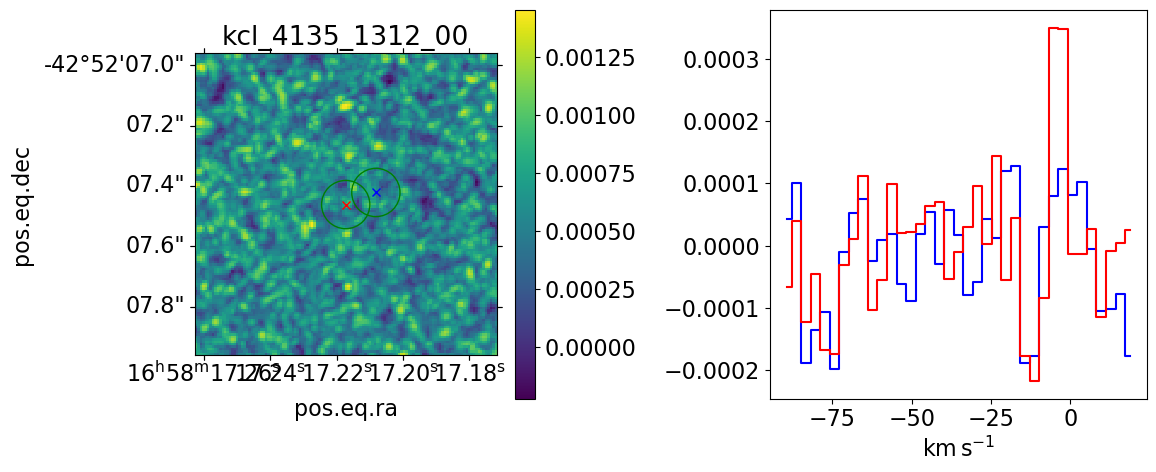

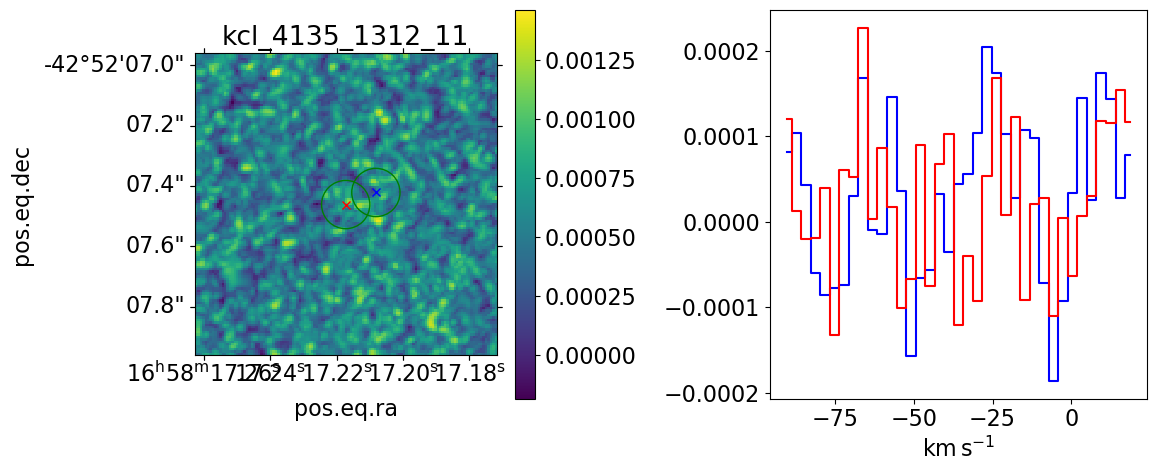

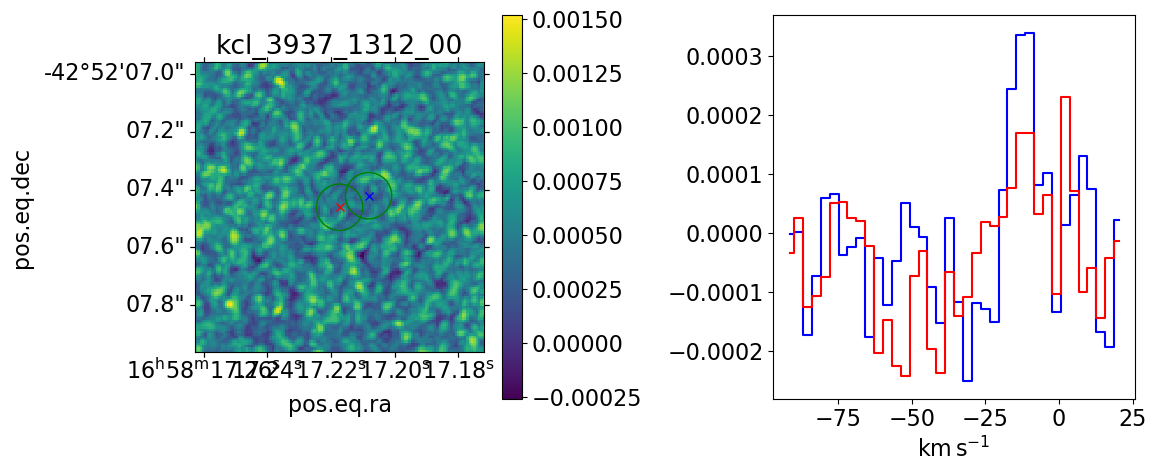

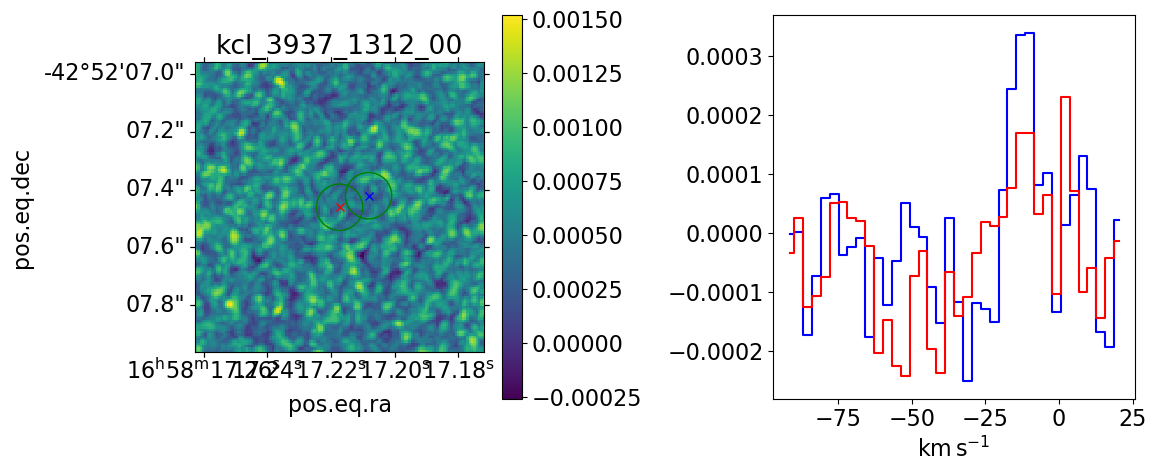

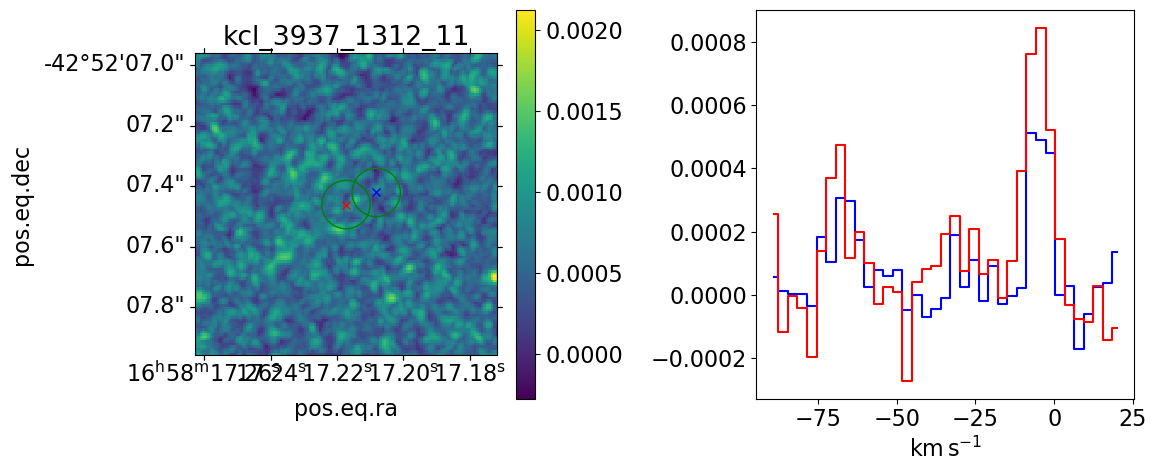

In [170]:
for cube in (nacl1817_2335_00_cube, nacl1817_2335_11_cube, nacl87_2337_33_cube, nacl2726_2335_00_cube, nacl2827_2337_22_cube, kcl4645_00_cube, kcl_4135_4746_00_cube, kcl1312_22_cube, kcl1312_11_cube, kcl1312_00_cube, kcl_4135_1312_00_cube, kcl_4135_1312_11_cube, kcl_3937_1312_00_cube, kcl_3937_1312_00_cube, kcl_3937_1312_11_cube):
    mx = cube.spectral_slab(-50*u.km/u.s, -20*u.km/u.s).max(axis=0)
    avspcA = cube.subcube_from_regions([peakAcirc]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).mean(axis=(1,2))
    avspcB = cube.subcube_from_regions([peakBcirc]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).mean(axis=(1,2))
    pl.figure(figsize=(10,5))
    ax = pl.subplot(1,2,1,projection=mx.wcs)
    _=pl.imshow(mx.value, origin='lower', interpolation='none')
    _=pl.colorbar()
    _=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'), color='b')
    _=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'), color='r')
    peakApix = peakAcirc.to_pixel(mx.wcs)
    ax.add_artist(peakApix.as_artist())
    peakBpix = peakBcirc.to_pixel(mx.wcs)
    ax.add_artist(peakBpix.as_artist())
    pl.title(names[cube])
    ax2 = pl.subplot(1,2,2)
    ax2.plot(avspcA.spectral_axis, avspcA.value, color='b', drawstyle='steps-mid')
    ax2.plot(avspcB.spectral_axis, avspcB.value, color='r', drawstyle='steps-mid')
    pl.tight_layout()

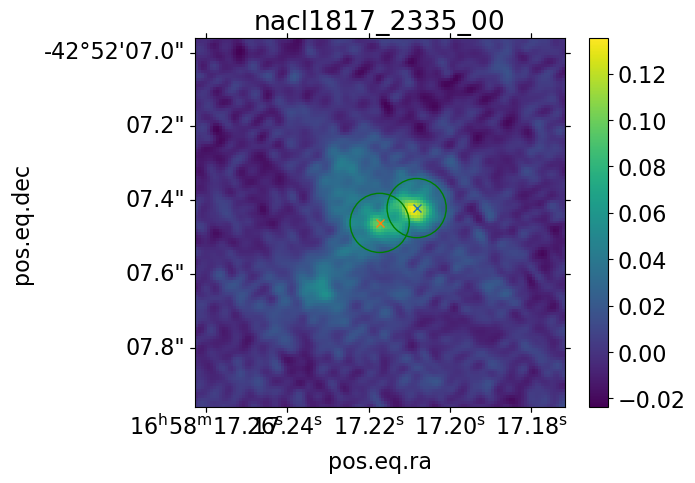

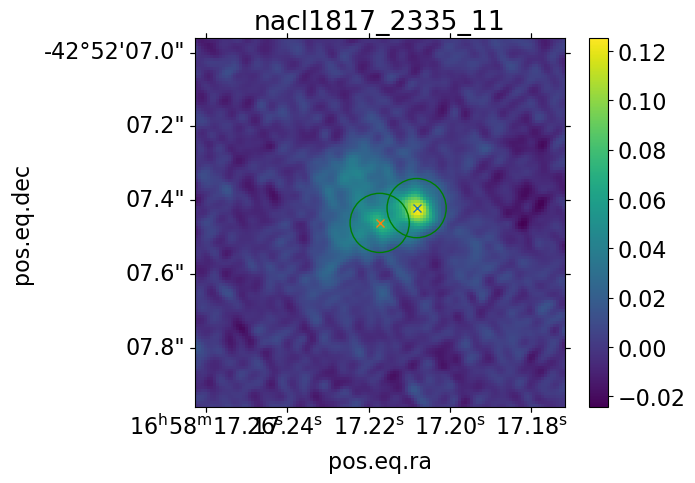

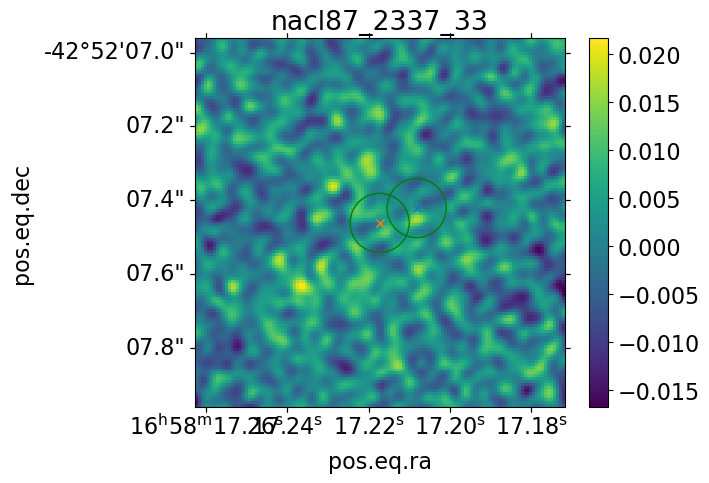

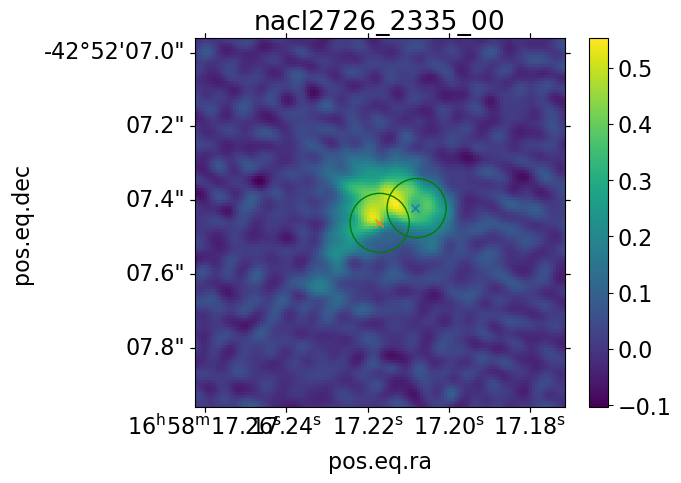

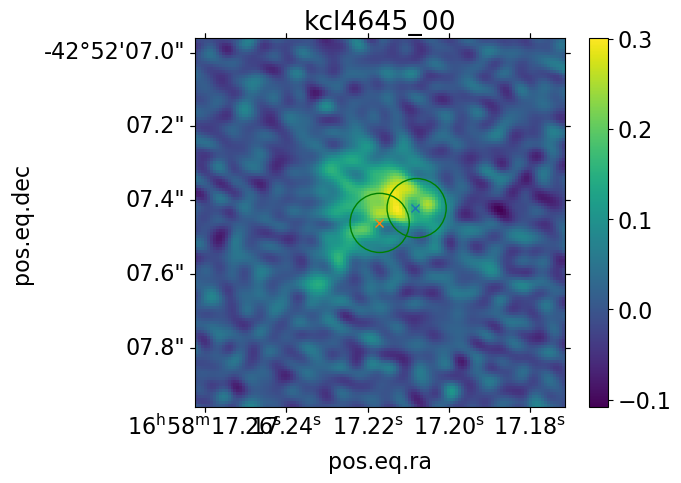

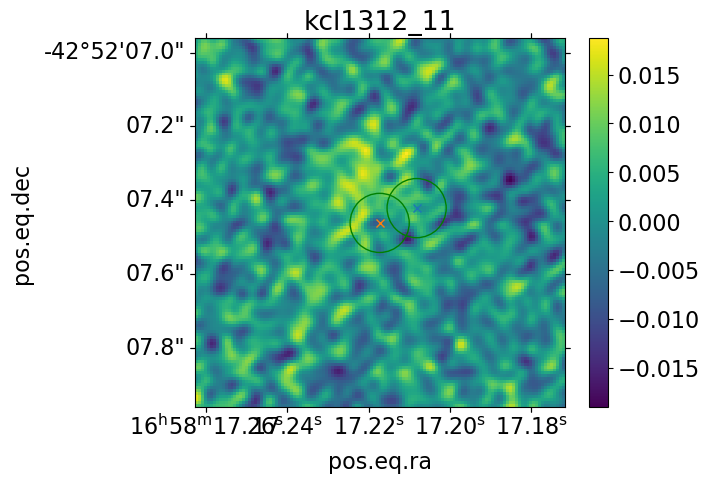

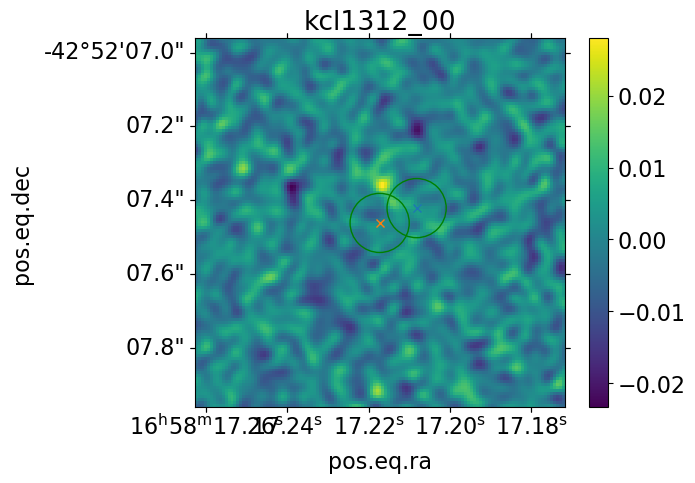

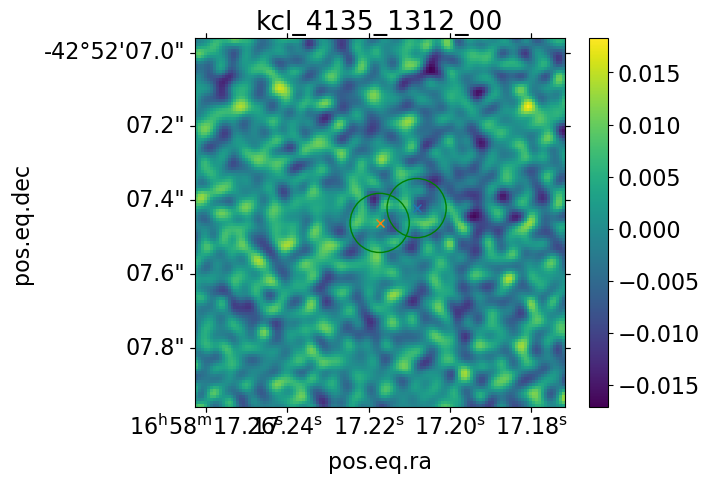

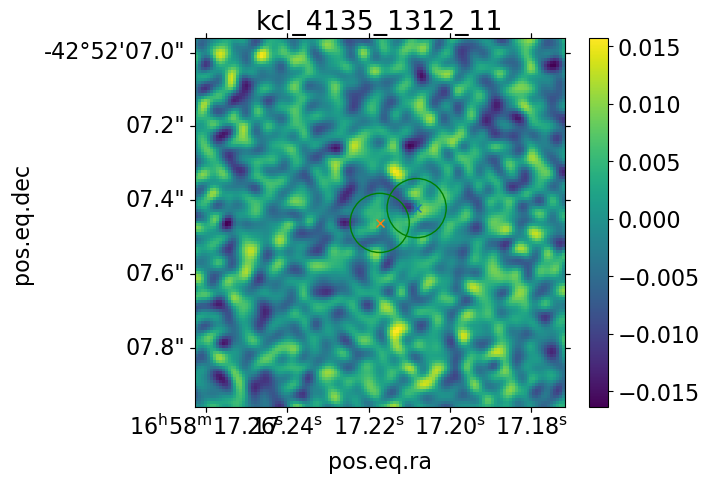

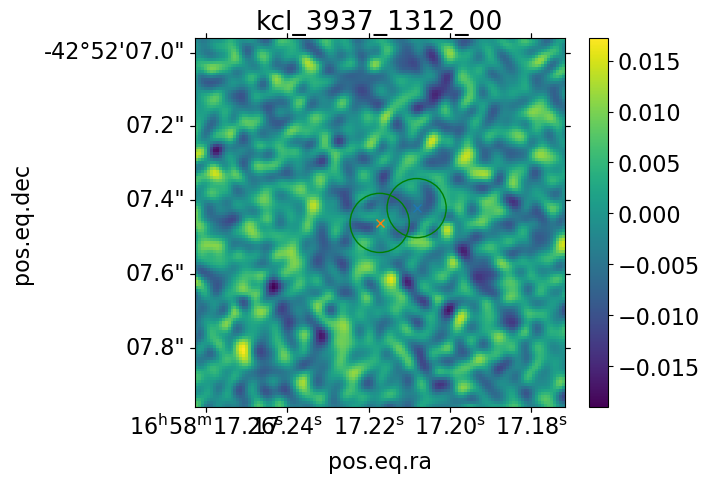

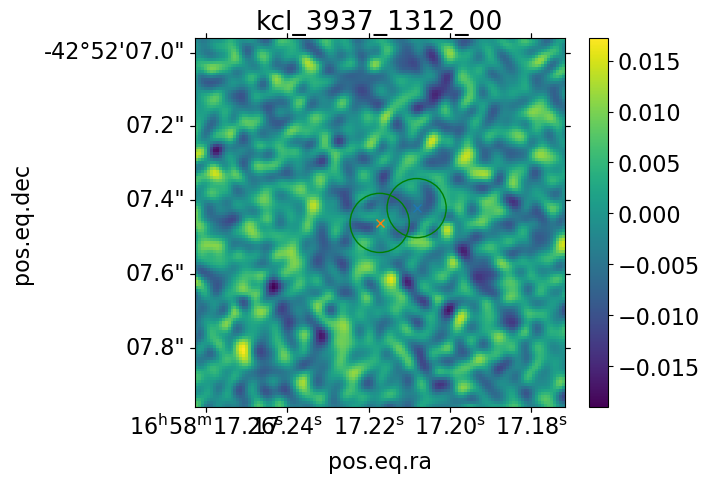

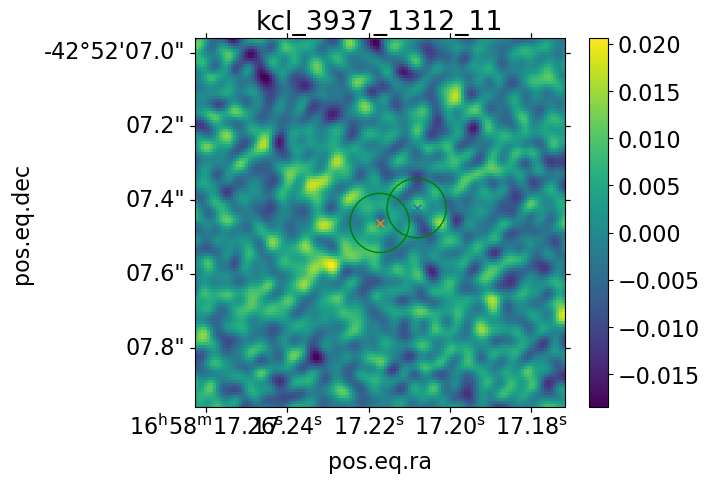

In [172]:
for cube in (nacl1817_2335_00_cube, nacl1817_2335_11_cube, nacl87_2337_33_cube, nacl2726_2335_00_cube, nacl2827_2337_22_cube, kcl4645_00_cube, kcl_4135_4746_00_cube, kcl1312_22_cube, kcl1312_11_cube, kcl1312_00_cube, kcl_4135_1312_00_cube, kcl_4135_1312_11_cube, kcl_3937_1312_00_cube, kcl_3937_1312_00_cube, kcl_3937_1312_11_cube):
    m0 = cube.spectral_slab(-50*u.km/u.s, -20*u.km/u.s).moment0(axis=0)
    pl.figure()
    ax = pl.subplot(projection=m0.wcs)
    _=pl.imshow(m0.value, origin='lower', interpolation='none')
    _=pl.colorbar()
    _=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
    _=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
    peakApix = peakAcirc.to_pixel(mx.wcs)
    ax.add_artist(peakApix.as_artist())
    peakBpix = peakBcirc.to_pixel(mx.wcs)
    ax.add_artist(peakBpix.as_artist())
    pl.title(names[cube])    

In [108]:
#mkdir YichenKei/spectra/

DaskSpectralCube with shape=(150, 1024, 1024) and unit=Jy / beam and chunk size (150, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    150  type_s: VRAD      unit_s: m / s  range:  -129659.672 m / s:   70466.694 m / s


DaskSpectralCube with shape=(121, 1024, 1024) and unit=Jy / beam and chunk size (121, 512, 512):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    121  type_s: VRAD      unit_s: m / s  range:  -129590.990 m / s:   70622.368 m / s


DaskSpectralCube with shape=(151, 1024, 1024) and unit=Jy / beam and chunk size (151, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    151  type_s: VRAD      unit_s: m / s  range:  -129919.397 m / s:   70050.460 m / s


DaskSpectralCube with shape=(102, 1024, 1024) and unit=Jy / beam and chunk size (102, 512, 512):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    102  type_s: VRAD      unit_s: m / s  range:  -129465.576 m / s:   37830.693 m / s


DaskSpectralCube with shape=(239, 1024, 1024) and unit=Jy / beam and chunk size (239, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    239  type_s: FREQ      unit_s: Hz     range: 353477288910.198 Hz:353942165265.733 Hz


DaskSpectralCube with shape=(239, 1024, 1024) and unit=Jy / beam and chunk size (239, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    239  type_s: FREQ      unit_s: Hz     range: 340196761206.799 Hz:340661637562.566 Hz


DaskSpectralCube with shape=(479, 1024, 1024) and unit=Jy / beam and chunk size (322, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    479  type_s: FREQ      unit_s: Hz     range: 86622858105.651 Hz:87089645798.932 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 96170856091.563 Hz:98042889581.083 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 233596511475.260 Hz:235468643860.464 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 216678950553.860 Hz:218551082939.064 Hz


DaskSpectralCube with shape=(1917, 1024, 1024) and unit=Jy / beam and chunk size (213, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1917  type_s: FREQ      unit_s: Hz     range: 219287242124.260 Hz:221158397914.701 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 231488254563.760 Hz:233360386948.964 Hz


DaskSpectralCube with shape=(958, 1024, 1024) and unit=Jy / beam and chunk size (322, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    958  type_s: FREQ      unit_s: Hz     range: 350736206986.829 Hz:352605477490.701 Hz


DaskSpectralCube with shape=(479, 1024, 1024) and unit=Jy / beam and chunk size (322, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    479  type_s: FREQ      unit_s: Hz     range: 338717811169.898 Hz:339651470404.965 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 98097950230.353 Hz:99969983719.873 Hz


DaskSpectralCube with shape=(1918, 1024, 1024) and unit=Jy / beam and chunk size (274, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:   1918  type_s: FREQ      unit_s: Hz     range: 84775580236.973 Hz:86647613726.552 Hz


DaskSpectralCube with shape=(161, 1024, 1024) and unit=Jy / beam and chunk size (161, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    161  type_s: VRAD      unit_s: m / s  range:  -129952.786 m / s:   70020.571 m / s


DaskSpectralCube with shape=(159, 1024, 1024) and unit=Jy / beam and chunk size (159, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    159  type_s: VRAD      unit_s: m / s  range:  -129436.166 m / s:   69516.903 m / s


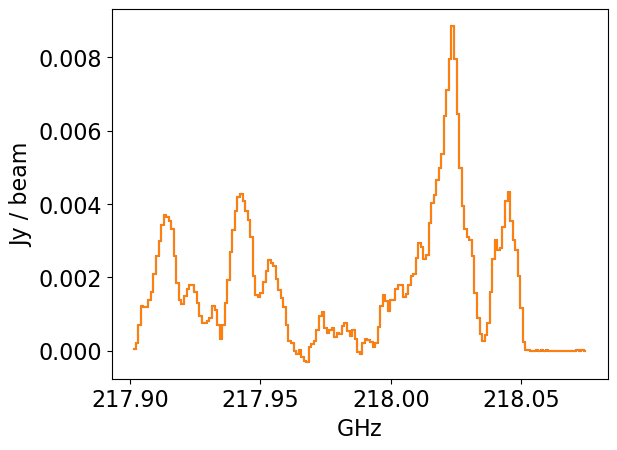

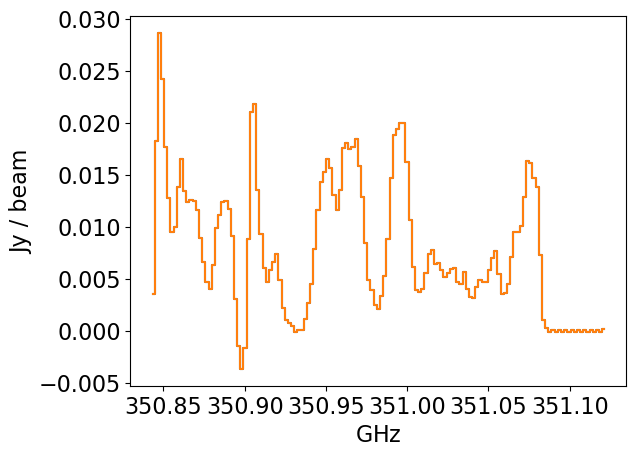

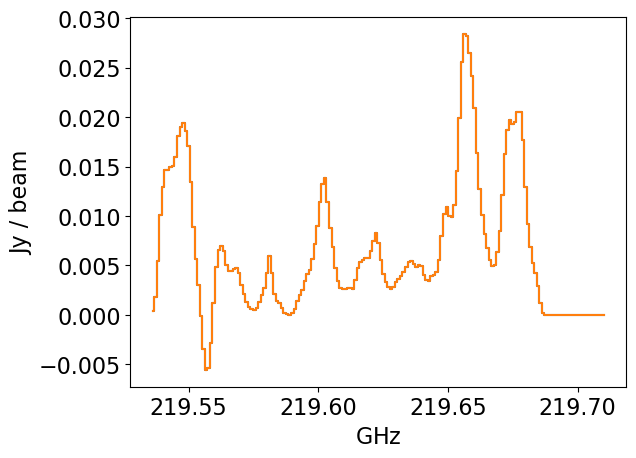

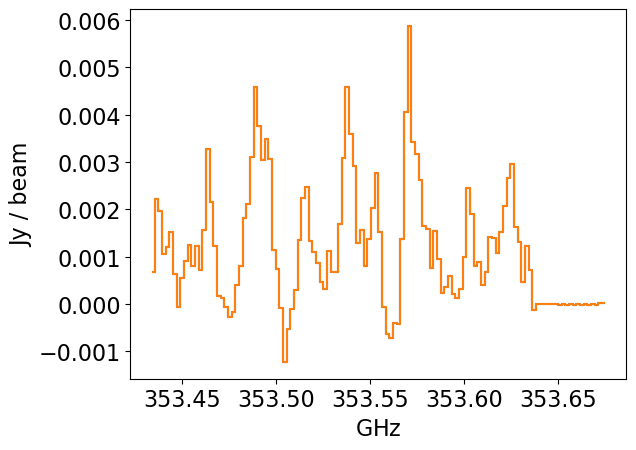

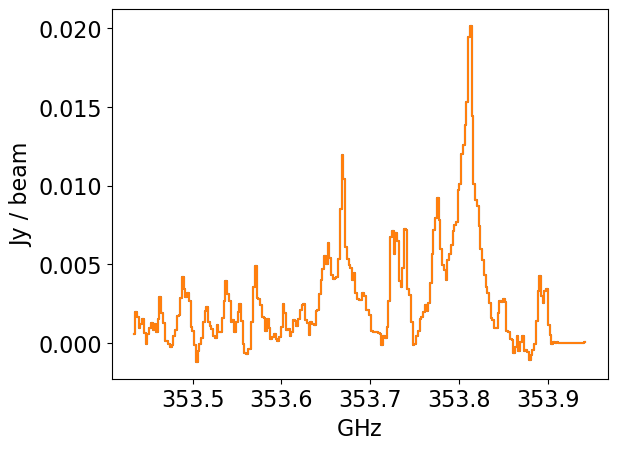

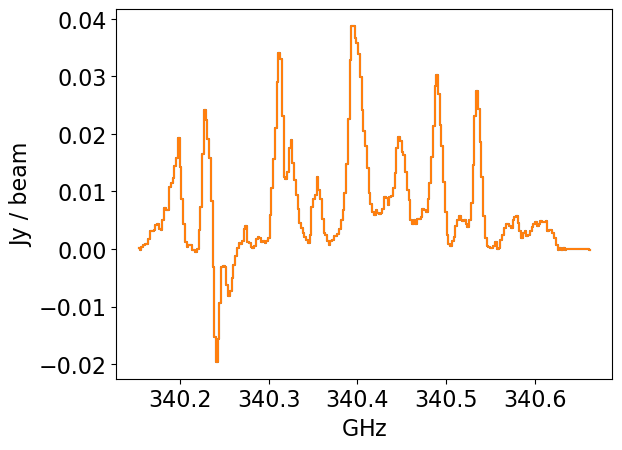

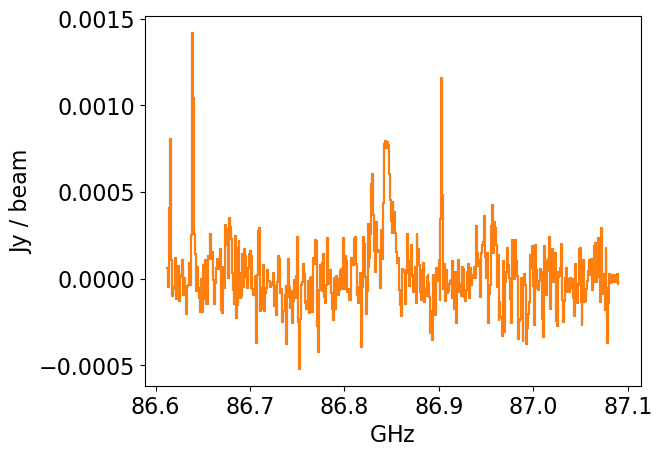

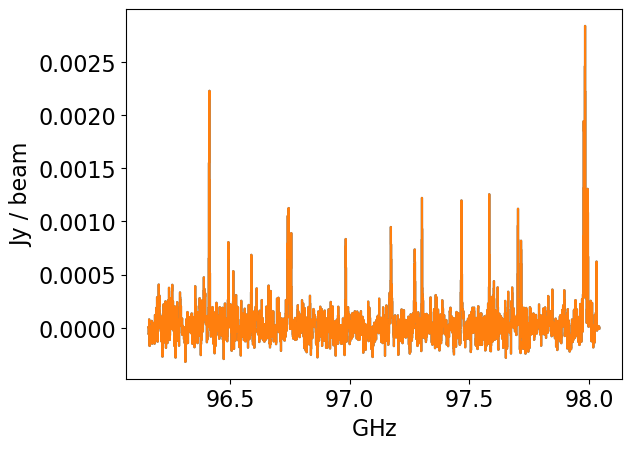

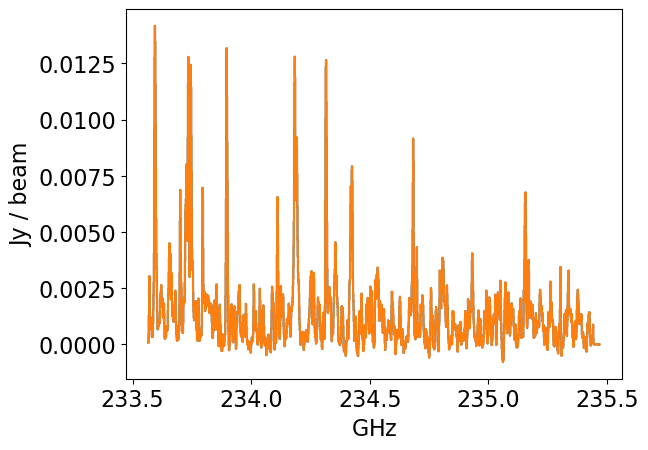

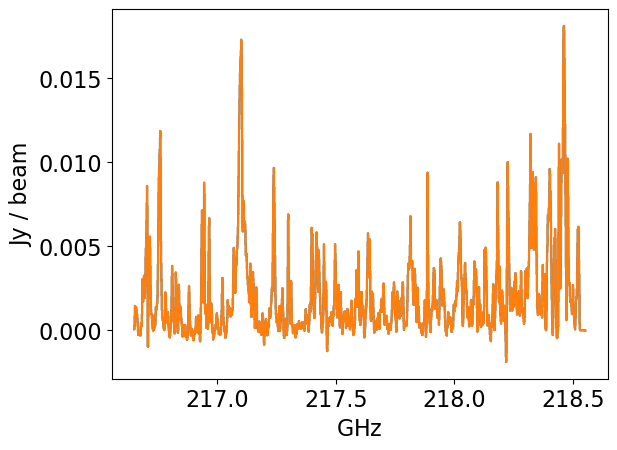

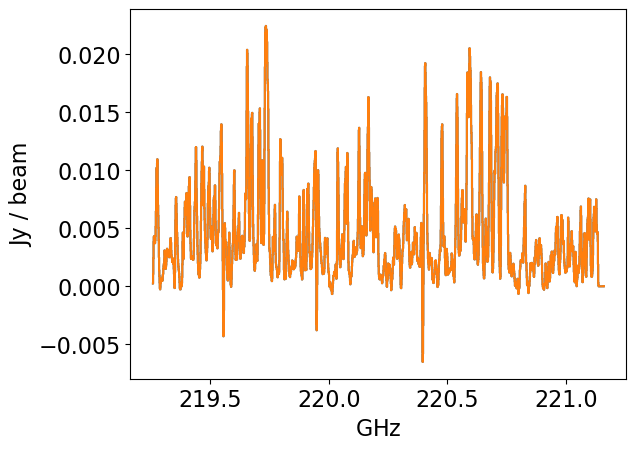

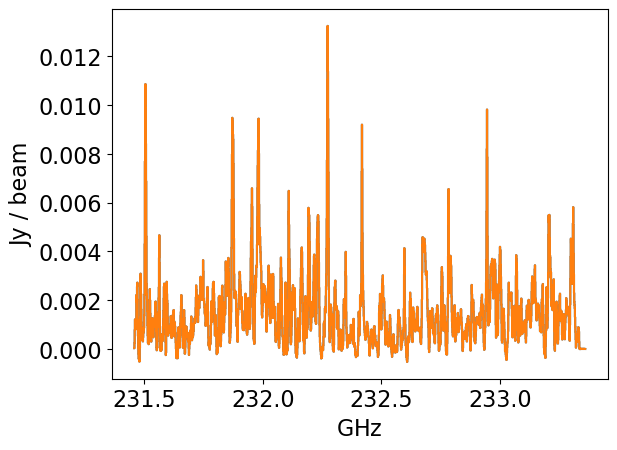

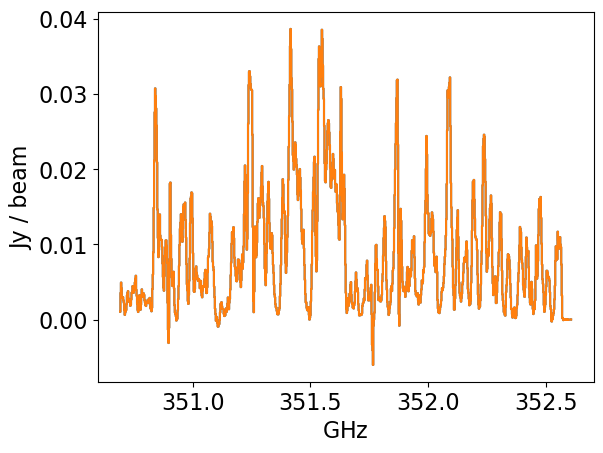

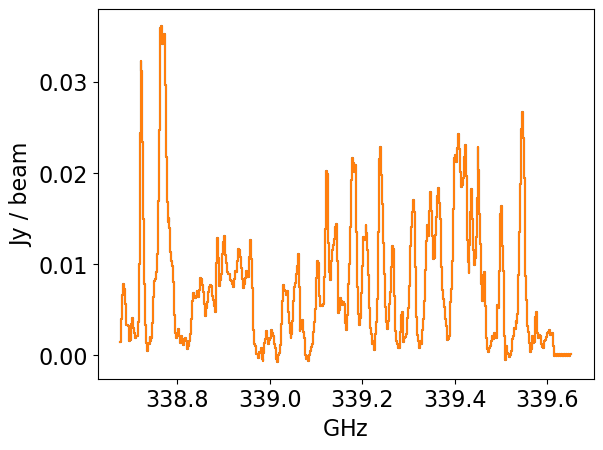

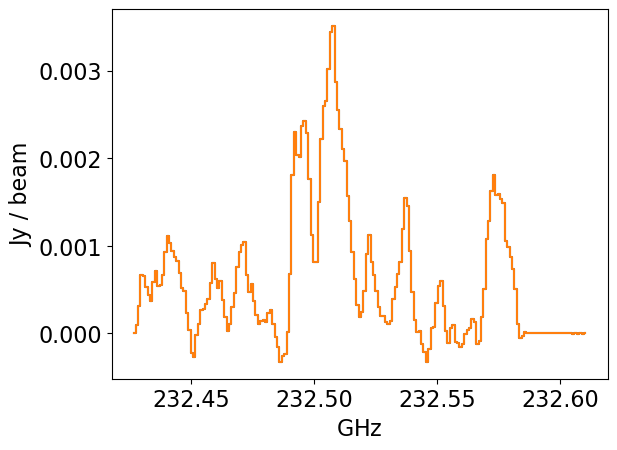

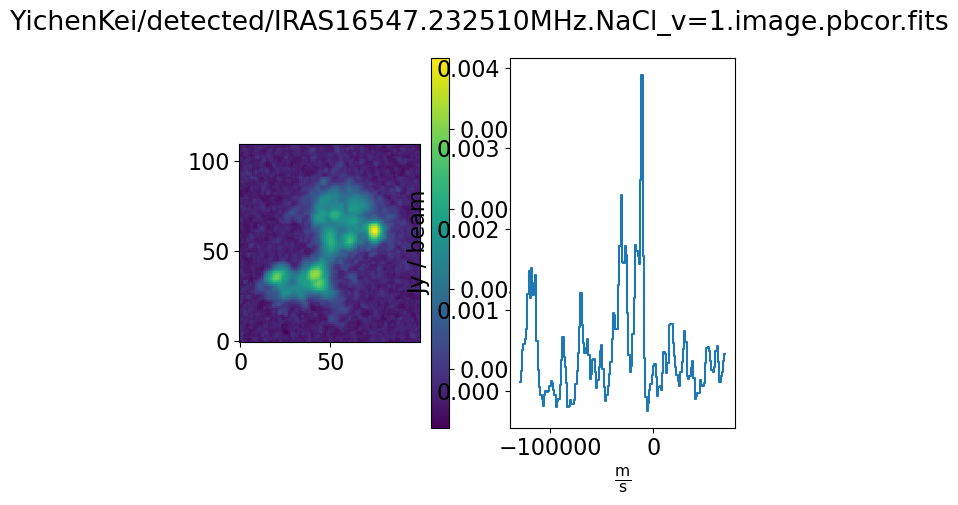

In [109]:
import glob
import spectral_cube.analysis_utilities
import reproject

flist = [x for x in glob.glob('YichenKei/*/*.fits') if 'spectra' not in x]
for fn in flist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)
    scube = cube[:,460:570,440:540]
    mx = scube.max(axis=0)
    msk = mx > 0.003*mx.unit
    sp = scube.with_mask(msk).mean(axis=(1,2))
    
    sp.write(f'YichenKei/spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)

    # convert the cube to velocity units with an arbitrary reference point
    # (this step assumes the cube is in frequency or wavelength; if the
    # cube is not, it should be skipped)
    if not cube.spectral_axis.unit.is_equivalent(u.km/u.s):
        fullcube = cube.with_spectral_unit(u.km/u.s,
                                           velocity_convention='radio',
                                           rest_value=cube.spectral_axis.mean())
    else:
        fullcube = cube

    # mask out super bright SiO masers; they break the FFT shifting tool
    # (this step can be skipped if there's nothing anomalously bright
    # in your spectrum)
    # fullcube = fullcube.with_mask(fullcube < 0.5*u.Jy/u.beam)

    for vmap, objname, reg in zip((vmapA, vmapB), ('A', 'B'), (peakAcirc, peakBcirc)):

        scube = fullcube.subcube_from_regions([reg])
        
        # reproject the velocity map into the cube's coordinate system
        vmap_proj,_ = reproject.reproject_interp(vmap.hdu,
                                                 scube.wcs.celestial,
                                                 shape_out=scube.shape[1:])
        vmap_proj = u.Quantity(vmap_proj, u.km/u.s)
        
        
        # perform the stacking!
        stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                               v0=0.0*u.km/u.s)
        fstack = stack.with_spectral_unit(u.GHz)

        pl.suptitle(f"{fn} {objname}")
        fstack.write(f'YichenKei/spectra/IRAS16547{basename}_{objname}_stack.fits', overwrite=True)

        pl.clf()
        fstack.quicklook(filename=f'YichenKei/spectra/figures/{basename}_IRAS16547{objname}_stack.pdf')
        fstack.quicklook(filename=f'YichenKei/spectra/figures/{basename}_IRAS16547{objname}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [110]:
known_lines = {'13CS': 231.220996*u.GHz,
               'CH3OH1029': 231.28115*u.GHz,
               'CH3CO?': 231.3104984*u.GHz,
               'H213CO': 231.2459639*u.GHz,
               'HNO3b?': 231.2517153*u.GHz,
               '(CH3)2COd?': 231.1999571*u.GHz,
               '34SO2': 219.3550091*u.GHz,
               'SO2v2=1': 219.466*u.GHz,
               'SO2': 219.276*u.GHz,
               'HC3Nv=1': 219.174*u.GHz,
               'HNO3?': 219.3838408*u.GHz,
               'MnO??': 219.3045193*u.GHz,
               '(CH3)2COa?': 219.2421408*u.GHz,
               '(CH3)2COb?': 219.2642749*u.GHz,
               '(CH3)2COc?': 219.219931*u.GHz,
              }
known_lines = {}

In [111]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue import Splatalogue
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [112]:
from astropy import units as u

mkdir YichenKei/spectra/figures

YichenKei/spectra/IRAS16547IRAS16547.Band6.spw1.selfcal.lowcontsub.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band6.spw2.selfcal.lowcontsub.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band3.spw2.selfcal.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band7.spw0.selfcal.lowcontsub.16chan.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band7.spw3.selfcal.lowcontsub.16chan.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band3.spw1.selfcal.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band7.spw3.selfcal.lowcontsub.16chan.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band3.spw1.selfcal.rp.image.pbco

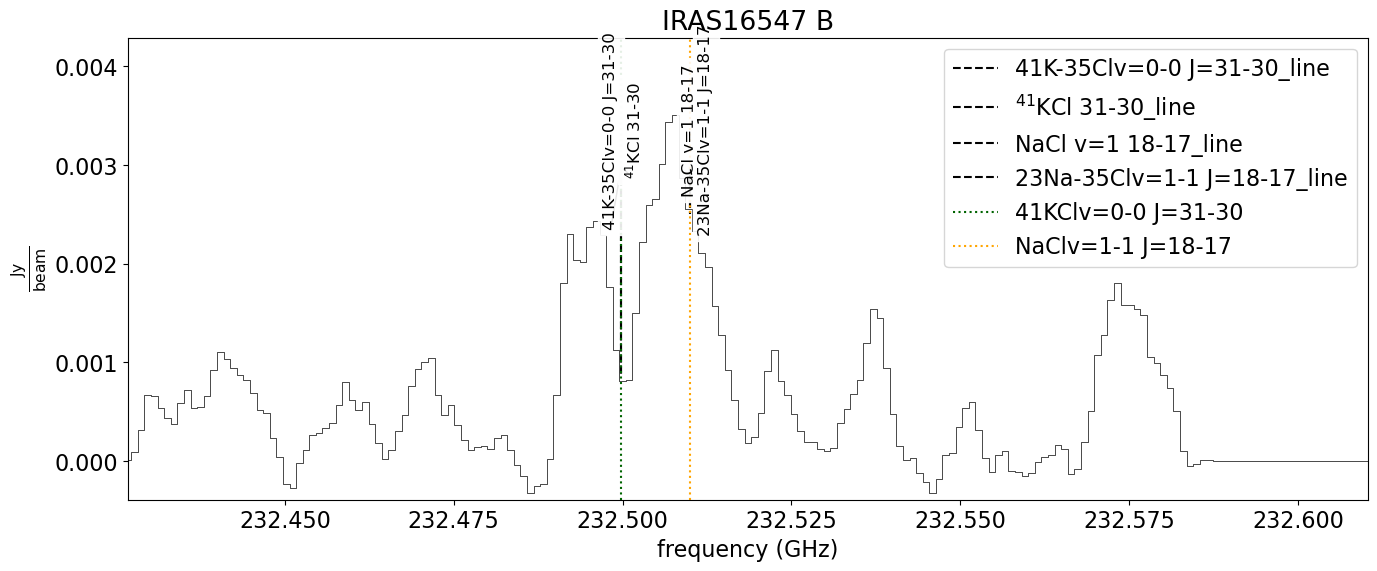

In [131]:
# (vcen in the stacked centroid is defined to be zero)
vcen = 0*u.km/u.s

pl.matplotlib.rcParams['font.size']=16

all_lines = {**lines.disk_lines, **lines.absorbers}

ided_linenames = sorted(all_lines.keys())
ided_linefreqs = u.Quantity([all_lines[x] for x in ided_linenames
                             #if 'U' not in x
                            ])
ided_linetexnames = [lines.texnames[x] if x in lines.texnames else x
                     for x in ided_linenames
                     #if 'U' not in x
                    ]

#salt_tables = [KCl, K37Cl, K41Cl, NaCl, Na37Cl, K41Cl37]
salt_colors = ['b', 'm', 'darkgreen', 'orange', 'c', 'y']

tables = salt_tables

def linename(row):
    return row['Species'] #"{0} {1}".format(row['Species'], row['QNs'])
def freq(row):
    return u.Quantity(row['Freq'], u.GHz)

linenames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4]
linetexnames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4] + ided_linetexnames
linetexnames = np.array(linetexnames)
linefreqs = np.hstack([u.Quantity([freq(row) for tbl in tables for row in tbl if row['vu'] <=4], u.GHz).value,
                       ided_linefreqs.value])
linefreqs = u.Quantity(linefreqs, u.GHz)


detection_table = table.Table.read(paths.tpath('salts_in_band.ipac'), format='ascii.ipac')
nondetections = (detection_table['Flag'] == '-n') | (detection_table['Flag'] == 'cn')
detection_table = detection_table[~nondetections]


paths.fpath = lambda x: f"YichenKei/spectra/figures/{x}"

flist = glob.glob('YichenKei/spectra/*stack*.fits')
for fn in flist:
    print(fn)

    sp_st = pyspeckit.Spectrum(fn)
    sp_st.xarr.convert_to_unit(u.GHz)
    
    if 'A_stack' in fn:
        sp_st.specname = 'IRAS16547 A'
    if 'B_stack' in fn:
        sp_st.specname = 'IRAS16547 B'        
    
    pl.figure(0, figsize=(16,6)).clf()
    sp_st.plotter(figure=pl.figure(0, figsize=(16,6)), clear=True)

    basefn = os.path.split(fn)[-1]

    lines_to_plot = ((linefreqs > sp_st.xarr.as_unit(linefreqs.unit).min()*(1-vcen/constants.c)) &
                     (linefreqs < sp_st.xarr.as_unit(linefreqs.unit).max()*(1+vcen/constants.c)))
    
    sp_st.plotter()#ymin=-0.0025, ymax=0.01)
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           label1_size=16,
                           auto_yloc_fraction=0.75)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))


    sp_st.plotter.savefig(paths.fpath('{0}'
                                      .format(basefn.replace("fits","png")))
                          )

    for obj in sp_st.plotter.axis.texts+sp_st.plotter.axis.lines:
        if 'Na' in obj.get_label():
            obj.set_color('r')
            obj.set_zorder(5)
        elif 'K' in obj.get_label():
            obj.set_color('b')
            obj.set_zorder(10)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))

    sp_st.plotter.savefig(paths.fpath('color_labels_{0}'
                                      .format(basefn.replace("fits","png")))
                          )


    sp_st.plotter()#ymin=-0.0025, ymax=0.01)

    # uses lines.py
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           auto_yloc_fraction=0.8)

    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))
    #sp_st.plotter.line_ids(ided_linetexnames, ided_linefreqs, velocity_offset=-vcen,
    #                       plot_kwargs=dict(color='b'))
    sp_st.plotter.savefig(paths.fpath('lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )

    #sp_st.plotter(ymin=-0.0025, ymax=0.01)
    # use the salt names directly.  This is for labeling of the colored
    # lines; the publication-ready stuff still uses lines.py
    #sp_st.plotter.line_ids(detection_table['Species'],
    #                       u.Quantity(detection_table['Frequency'], u.GHz),
    #                       velocity_offset=-vcen,
    #                       auto_yloc_fraction=0.8)

    for tbl,color,nm in zip(salt_tables, salt_colors, salt_table_names):
        for row in tbl:
            frq = u.Quantity(row['Freq'], u.GHz)
            if frq > sp_st.xarr.min() and frq < sp_st.xarr.max():
                #print(row)
                sp_st.plotter.axis.axvline((frq*(1-vcen/constants.c)).to(u.GHz).value,
                                          #-0.05, 0.10,
                                          color=color, linestyle=':', label=nm+row['QNs'])

    #for linename, linefreq in known_lines.items():
    #    sp_st.plotter.axis.axvline((linefreq*(1-vcen/constants.c)).to(u.GHz).value,
    #                              #-0.05, 0.10,
    #                              color='g' if '?' in linename else 'r', linestyle='--', label=linename)

    #for row in HCl:
    #    frq = u.Quantity(row['Freq'], u.GHz).value
    #    if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
    #        sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
    #                                  -0.05, 0.10,
    #                                  colors='g', linestyles='--')
    pl.legend(loc='upper right')

    sp_st.plotter.savefig(paths.fpath('diagnostic_lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )

#    # Do another one just for SiO
#    sp_st.plotter()#ymin=-0.0025, ymax=0.01)
#
#    # uses lines.py
#    sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                           auto_yloc_fraction=0.8)
#
#    for txt in sp_st.plotter.axis.texts:
#        txt.set_backgroundcolor((1,1,1,0.9))
#
#
#    for tbl,color in zip(sis_tables, salt_colors):
#        for row in tbl:
#            frq = u.Quantity(row['Freq'], u.GHz).value
#            if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                          -0.05, 0.10,
#                                          colors=color, linestyles=':')
#
#    sp_st.plotter.savefig(paths.fpath('sis_diagnostic_lines_labeled_{0}'
#                                      .format(basefn.replace("fits","png")))
#                         )

    # Do another one just for alcl
#    sp_st.plotter(ymin=-0.0025, ymax=0.01)
#
#    # uses lines.py
#    sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                           auto_yloc_fraction=0.8)
#
#    for txt in sp_st.plotter.axis.texts:
#        txt.set_backgroundcolor((1,1,1,0.9))
#
#    for tbl,color in zip([AlCl, AlF, Al37Cl, NaF, AlOH, AlO], salt_colors):
#        for row in tbl:
#            frq = u.Quantity(row['Freq'], u.GHz).value
#            if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                          -0.05, 0.10,
#                                          colors=color, linestyles=':')
#
#
#    sp_st.plotter.savefig(paths.fpath('alcl_diagnostic_lines_labeled_{0}'
#                                      .format(basefn.replace("fits","png")))
#                         )
#
#
#    for (a,b) in zip(linetexnames, linefreqs):
#        if (b>sp_st.xarr.min()) and (b<sp_st.xarr.max()) and a not in ided_linetexnames:
#            print("'{0}': {1}*u.{2},".format(a,b.value,b.unit))

#    for speciesname, species in (('NaCN', NaCN), ('SO2',SO2), ('SO', SO), ('CaS', CaS), ('CaO', CaO)):
#        # Do another one just for nacn
#        sp_st.plotter(ymin=-0.0025, ymax=0.01)
#
#        # uses lines.py
#        sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                               auto_yloc_fraction=0.8)
#
#        for txt in sp_st.plotter.axis.texts:
#            txt.set_backgroundcolor((1,1,1,0.9))
#
#        for tbl,color in zip([species], ['b']):
#            for row in tbl:
#                frq = u.Quantity(row['Freq'], u.GHz).value
#                if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                    sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                              -0.05, 0.10,
#                                              colors=color, linestyles=':')
#
#
#        sp_st.plotter.savefig(paths.fpath('{1}_diagnostic_lines_labeled_{0}'
#                                          .format(basefn.replace("fits","png"),
#                                                  speciesname
#                                                 ))
#                             )

In [126]:
import shutil

In [132]:
os.chdir('/orange/adamginsburg/salt')
for pfx in ('sis_diagnostic_lines', 'diagnostic_lines', 'CaO_diagnostic_lines', 'CaS_diagnostic_lines', 'NaCN_diagnostic_lines', 'SO_diagnostic_lines', 'SO2_diagnostic_lines', 
            'alcl_diagnostic_lines', 'color_labels', 'lines_labeled', 'sis_diagnostic_lines'):
    if not os.path.exists(paths.fpath(pfx)):
        os.mkdir(paths.fpath(pfx))
        print(os.getcwd())
    cwd = os.getcwd()
    print(cwd)
    for fn in glob.glob(paths.fpath(pfx)+"*png"):
        os.chdir(paths.fpath(pfx))
        print(os.getcwd())
        if not os.path.exists(os.path.basename(fn)):
            os.symlink('../' + os.path.basename(fn), os.path.basename(fn))
        shutil.copy('../style.css', '.')
        shutil.copy('../gallery.html', '.')
        os.chdir(cwd)

/orange/adamginsburg/salt
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt/YichenKei/spectra/figures/sis_diagnostic_lines
/orange/adamginsburg/salt

In [ ]:
os.path.exists(paths.fpath(pfx))

In [ ]:
os.chdir(cwd)

In [ ]:
if not os.path.exists(paths.fpath(pfx)):
    os.mkdir(paths.fpath(pfx))

In [ ]:
pwd

In [ ]:
salt_tables[0]

In [ ]:
nacltbl = salt_tables[3]

In [ ]:
pl.plot(nacltbl['Freq'], nacltbl['E_U'], '.')
pl.xlim(233,236)

In [ ]:
pl.plot(nacltbl['Freq'], nacltbl['vu'], '.')
pl.xlim(233,236)

In [124]:
lines_to_plot

array([False, False, False, ..., False, False, False])